<a href="https://colab.research.google.com/github/MatiasHolmemoMardal/FastMONAI/blob/main/V2_FastMONAI_MedMNIST_Single_label_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FastMONAI Single-label classification



## Install FastMONAI and MedMNIST v2 dataset

In [1]:
!pip install fastMONAI
!pip install medmnist
!pip install fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.8/172.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 107.4 MB/s eta 0:00:00
     ━━━━━━━━

### Import vision from fastMONAI

In [2]:
from fastMONAI.vision_all import *
import pandas as pd
import os
import numpy as np

## Download NoduleMNIST3D from MedMNIST

In [3]:
path = Path('../data')
path.mkdir(exist_ok=True)

In [4]:
train_val_df, test_df = download_NoduleMNIST3D(path=path)

NoduleMNIST3D.npz: 27.9MB [00:39, 746kB/s]                             

2023-04-21 12:33:53,517 - INFO - Downloaded: ../data/NoduleMNIST3D/NoduleMNIST3D.npz
2023-04-21 12:33:53,518 - INFO - Expected md5 is None, skip md5 check for file ../data/NoduleMNIST3D/NoduleMNIST3D.npz.


In [5]:
df = pd.concat([train_val_df, test_df], ignore_index=True)

## Get information about the data

Cant use MedDataset() because MedMNIST dataset is not on dicom form

In [6]:
df.shape

(1633, 3)

In [7]:
test_df.shape

(310, 3)

In [8]:
train_val_df.shape

(1323, 3)

In [9]:
df.head()

,img_path,labels,is_val
0,../data/NoduleMNIST3D/train_images/0_nodule.nii.gz,b,False
1,../data/NoduleMNIST3D/train_images/1_nodule.nii.gz,m,False
2,../data/NoduleMNIST3D/train_images/2_nodule.nii.gz,m,False
3,../data/NoduleMNIST3D/train_images/3_nodule.nii.gz,b,False
4,../data/NoduleMNIST3D/train_images/4_nodule.nii.gz,b,False


In [10]:
train_val_df.head()

,img_path,labels,is_val
0,../data/NoduleMNIST3D/train_images/0_nodule.nii.gz,b,False
1,../data/NoduleMNIST3D/train_images/1_nodule.nii.gz,m,False
2,../data/NoduleMNIST3D/train_images/2_nodule.nii.gz,m,False
3,../data/NoduleMNIST3D/train_images/3_nodule.nii.gz,b,False
4,../data/NoduleMNIST3D/train_images/4_nodule.nii.gz,b,False


In [11]:
test_df.head()

,img_path,labels,is_val
0,../data/NoduleMNIST3D/test_images/0_nodule.nii.gz,b,False
1,../data/NoduleMNIST3D/test_images/1_nodule.nii.gz,b,False
2,../data/NoduleMNIST3D/test_images/2_nodule.nii.gz,b,False
3,../data/NoduleMNIST3D/test_images/3_nodule.nii.gz,b,False
4,../data/NoduleMNIST3D/test_images/4_nodule.nii.gz,b,False


In [12]:
df.head()

,img_path,labels,is_val
0,../data/NoduleMNIST3D/train_images/0_nodule.nii.gz,b,False
1,../data/NoduleMNIST3D/train_images/1_nodule.nii.gz,m,False
2,../data/NoduleMNIST3D/train_images/2_nodule.nii.gz,m,False
3,../data/NoduleMNIST3D/train_images/3_nodule.nii.gz,b,False
4,../data/NoduleMNIST3D/train_images/4_nodule.nii.gz,b,False


# Data Augmentation

In [13]:
from fastai.vision.augment import *


adding random rotation on the images

In [14]:
aug_transforms = [RandomFlip(p=0.5, axes='LR'), RandomAffine(degrees=10, p=0.5)]

# Load the images

In [15]:
dls = MedImageDataLoaders.from_df(
    df=train_val_df, 
    fn_col='img_path', 
    label_col='labels', 
    bs = 64,
    val_pct=0.2,
    aug_transforms=aug_transforms,
    num_workers=None
)

show batch

/usr/local/lib/python3.9/dist-packages/fastMONAI/vision_plot.py:15: UserWarning: Voxel size not defined. Aspect ratio of the plot might not be correct.
  warnings.warn('Voxel size not defined. Aspect ratio of the plot might not be correct.')


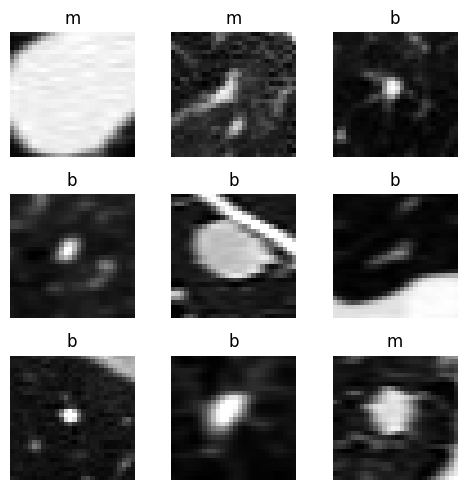

In [16]:
dls.show_batch(figsize=(5,5),anatomical_plane=2)

## Import classifier model from MONAI and train

in_shape = picture size

In [17]:
from monai.networks.nets import Classifier

model = Classifier(
    in_shape=[1, 28, 28, 28], 
    classes=2, 
    channels=(8, 16, 32, 64, 128), 
    strides=(2, 2, 2, 2)
)

In [18]:
import torch
from torch.nn import CrossEntropyLoss

Define and crate weight class

In [19]:
# Define class weights
class_weights = torch.tensor([1.0, 2.0]).cuda()

# Create a weighted loss function
weighted_loss = CrossEntropyLoss(weight=class_weights)

Set the metrics to to get f1 score

In [20]:
#learn = Learner(dls, model, metrics=accuracy)
#learn = Learner(dls, model, metrics=[F1Score()], loss_func=weighted_loss)
learn = Learner(dls, model, metrics=[F1Score()])

find the best learning rate using learn.lr_fin()

SuggestedLRs(valley=0.00019054606673307717)

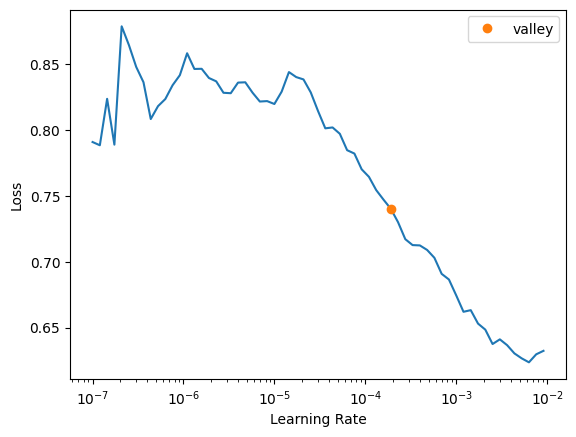

In [21]:
learn.lr_find()

In [22]:
from fastai.callback.tracker import EarlyStoppingCallback

* Train model with the best learning rate
* SMC saves the best model during training
* ESC stops the training when improvement stops

didn't use the learning rate because we got a better model without it



In [23]:
#suggested_lr = 1e-4

callbacks = [
    SaveModelCallback(monitor='valid_loss', fname='best_model', with_opt=True),
    EarlyStoppingCallback(monitor='valid_loss', patience=3)
]

learn.fit_one_cycle(10, cbs=callbacks)

epoch,train_loss,valid_loss,f1_score,time
0,0.654701,0.417602,0.711409,00:06
1,0.510970,0.523493,0.517857,00:07
2,0.425165,0.515026,0.666667,00:05
3,0.303103,0.669888,0.560000,00:08


Better model found at epoch 0 with valid_loss value: 0.41760164499282837.
No improvement since epoch 0: early stopping


load the best model from training

In [24]:
#learn.load("best_model")

show batch with target and prediction, green if target=prediction, red if not

/usr/local/lib/python3.9/dist-packages/fastMONAI/vision_plot.py:15: UserWarning: Voxel size not defined. Aspect ratio of the plot might not be correct.
  warnings.warn('Voxel size not defined. Aspect ratio of the plot might not be correct.')


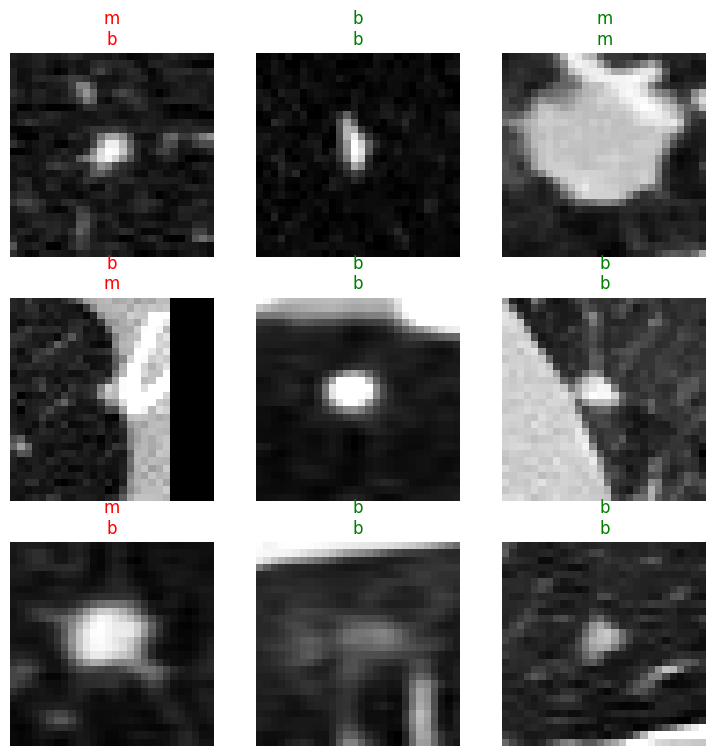

In [24]:
learn.show_results(anatomical_plane=2)

## Save model

In [28]:
learn.save('medmnist-lung')

Path('models/medmnist-lung.pth')

In [31]:
if 'google.colab' in str(get_ipython()):
  temp_path = Path('/content/drive/MyDrive/DAT255/FastMONAI/models')
else:
  temp_path = Path(os.getcwd())
learn.path = temp_path

In [32]:
learn.export('medmnist-lung.pkl')

## Load model and plot confusion matrix, classification report and top losses

In [ ]:
import os
os.chdir('/content/drive/MyDrive/path/to/your/pkl/file/')

In [ ]:
learn.load('model-3');

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

Print a confusion matrix

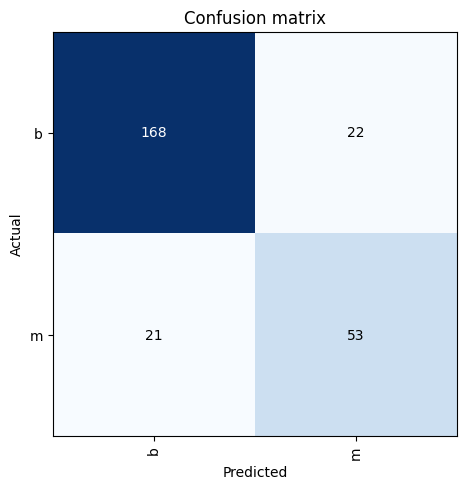

In [26]:
interp.plot_confusion_matrix()

Print classification report with f1 scores for benign and manign predictions

In [27]:
interp.print_classification_report()

              precision    recall  f1-score   support

           b       0.89      0.88      0.89       190
           m       0.71      0.72      0.71        74

    accuracy                           0.84       264
   macro avg       0.80      0.80      0.80       264
weighted avg       0.84      0.84      0.84       264



Plot top losses to see the worst predictions with confidence

/usr/local/lib/python3.9/dist-packages/fastMONAI/vision_plot.py:15: UserWarning: Voxel size not defined. Aspect ratio of the plot might not be correct.
  warnings.warn('Voxel size not defined. Aspect ratio of the plot might not be correct.')


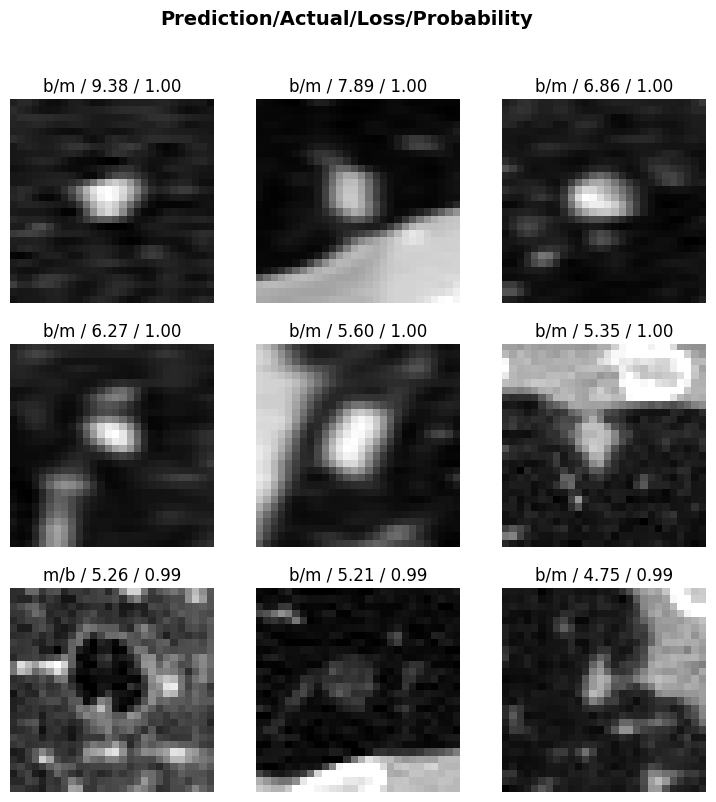

In [30]:
interp.plot_top_losses(k=9, anatomical_plane=2) 